Dictionary for experimental data

NOTE:
    - Expected: Working directy should be, \PSU-PHYS296\Python\notebooks

In [1]:
import os
from pandas import read_excel as read
from pandas import DataFrame as df
import matplotlib.pyplot as plt
# enable plots in the notebook
%matplotlib inline 

In [2]:
## Check current dir
current = os.getcwd() # get current dir
# Insert test for current = \PSU-PHYS296\Python\notebooks
print "Current working directory %s" % current # check current dir

# Untested
os.chdir('../') # move dir back one 
current = os.getcwd() # get current dir
print "Moved Working directory back  %s" % current # check current dir

Current working directory E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python\notebooks
Moved Working directory back  E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python


In [3]:
## Set working directory
path = current+'\\database\\sidis\\expdata\\'
os.chdir(path) # one dir back
# Check 
newDir = os.getcwd() # get current dir
print "Working directory for data %s" % newDir # check current dir

Working directory for data E:\Laptop\School\Fa_17\Phys296\GIT\PSU-PHYS296\Python\database\sidis\expdata


In [4]:
## Grabing files
data=os.listdir('./') # list all files in dir
data=[files for files in data if files.endswith('.xlsx') and not files.startswith('~')] # list of COMPASS data
print "Data files retrieved %s" % data


Data files retrieved ['1000.xlsx', '1001.xlsx', '1002.xlsx', '1003.xlsx', '1004.xlsx', '1005.xlsx', '1006.xlsx', '1007.xlsx', '2000.xlsx', '2001.xlsx', '2002.xlsx', '5001.xlsx', '5002.xlsx']


In [16]:
## Reading expdata data
# dictionary of pandas dataframes for each expdata
expdata={} # initialise dictionary
file=[os.path.splitext(each)[0] for each in data] # remove the .xlxs extenstion for key names
count=0 # start counter
for i in data: # for each element i in the data
    expdata[file[count]]=df(read(i)) # make a key for each element name and read the data set as the value
    count+=1 # add one to counter

# Check contents of dictionary
for key in expdata.keys():
    print "key \n%s\n head\n%s" %(key,expdata[key].head())


key 
5002
 head
   Ebeam      x    Q2      y    z        pT   pT2        obs   value  stat_u  \
0    160  0.157  20.0  0.439  0.2  0.300000  0.09  M_Compass  4.9485  0.2660   
1    160  0.157  20.0  0.439  0.2  0.331662  0.11  M_Compass  4.4538  0.2661   
2    160  0.157  20.0  0.439  0.2  0.360555  0.13  M_Compass  4.2050  0.2496   
3    160  0.157  20.0  0.439  0.2  0.400000  0.16  M_Compass  3.6758  0.1926   
4    160  0.157  20.0  0.439  0.2  0.424264  0.18  M_Compass  3.1909  0.1831   

    sys_u    target hadron      col  
0  0.1005  deuteron    pi-  compass  
1  0.1040  deuteron    pi-  compass  
2  0.1035  deuteron    pi-  compass  
3  0.1033  deuteron    pi-  compass  
4  0.1061  deuteron    pi-  compass  
key 
5001
 head
   Ebeam      x    Q2      y    z        pT   pT2        obs   value  stat_u  \
0    160  0.157  20.0  0.439  0.2  0.300000  0.09  M_Compass  6.2719  0.3126   
1    160  0.157  20.0  0.439  0.2  0.331662  0.11  M_Compass  6.2175  0.3135   
2    160  0.157  20

In [10]:
## Ploting pT as a function of ALL

def plotALL(key):
    x=expdata[key]
    delta = (x.stat_u**2.0+x.sys_u**2.0)**(1/2.0)
    plt.errorbar(x.pT,x.value,delta,
                 fmt='o',mfc='green',
                 ecolor='green',capsize=5)
    plt.title("Data %s" % key) 
    plt.xlabel("pT")
    plt.ylabel("ALL")
    


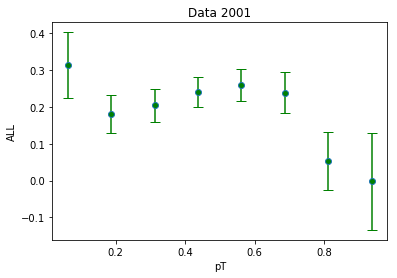

In [11]:
plotALL('2001')